In [7]:
import pandas as pd
import numpy   as np
import sys
import warnings

warnings.filterwarnings('ignore')

In [12]:
data=pd.read_csv('../Datos/DatosBalanceados_25%.csv')
data.shape
data.head()
data['cargo']=data['cargo'].str.lower()
datos=data[['Valor crédito','Plazo crédito','Fecha desembolso','Plazo residual','Saldo  Capital',
            'Motivo salida' ,'edad','endeudameinto','antigüedad cuando otorgaron el crédito',
            'tiempo trabajado','cargo','tasa','cuota total','Cuentas x Cobrar','Cuo. Ven.','Dias  Mora',
            'Calif. Ope. Sup. Act.','Linea de Credito','Provisión General','Estado Crediticio',
            'Mora últimos 6 meses ','Mora últimos 3 meses']]
datos[['Plazo residual']]=datos[['Plazo residual']].astype(int)
datos['Mora'] =[1 if datos['Cuo. Ven.'][i]!= 0 else 0 for i in range(176) ]
datos['Mora últimos 6 meses '] =[1 if datos['Mora últimos 6 meses '][i]!= 0 else 0 for i in range(176) ]
datos['Mora últimos 3 meses'] =[1 if datos['Mora últimos 3 meses'][i]!= 0 else 0 for i in range(176) ]

In [36]:
var_num= ['Valor crédito','Plazo crédito', 'Plazo residual', 'Saldo  Capital', 'edad',
          'endeudameinto', 'antigüedad cuando otorgaron el crédito', 'tiempo trabajado',
           'tasa', 'cuota total', 'Cuentas x Cobrar', 'Provisión General']
var_cat=['cargo','Calif. Ope. Sup. Act.', 'Linea de Credito', 'Mora últimos 6 meses ', 'Mora últimos 3 meses']

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(datos,test_size=0.2,random_state=1)
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [16]:
from optbinning import OptimalBinning
target=train['Mora']
x=train[var_num]

In [24]:
print(var_num[0])
var_woe=var_num[0]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Valor crédito


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 67845500.00)",21,0.150000,16,5,0.238095,0.026072,0.000101,0.000013
1,"[67845500.00, 211322640.00)",34,0.242857,33,1,0.029412,2.359429,0.665144,0.068012
2,"[211322640.00, 332500000.00)",34,0.242857,26,8,0.235294,0.041576,0.000415,0.000052
3,"[332500000.00, inf)",51,0.364286,31,20,0.392157,-0.698824,0.206700,0.025324
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.872361,0.093401


In [25]:
print(var_num[1])
var_woe=var_num[1]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Plazo crédito


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 162.00)",29,0.207143,24,5,0.172414,0.431537,0.034245,0.004248
1,"[162.00, inf)",111,0.792857,82,29,0.261261,-0.097655,0.007750,0.000968
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.041995,0.005216


In [26]:
print(var_num[2])
var_woe=var_num[2]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Plazo residual


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 32.00)",18,0.128571,13,5,0.277778,-0.181567,0.004433,0.000553
1,"[32.00, 88.00)",36,0.257143,35,1,0.027778,2.418269,0.727360,0.073723
2,"[88.00, inf)",86,0.614286,58,28,0.325581,-0.40884,0.112987,0.014026
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.844780,0.088302


In [23]:
print(var_num[3])
var_woe=var_num[3]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Saldo  Capital


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11236540.00)",11,0.078571,6,5,0.454545,-0.954757,0.086363,0.010403
1,"[11236540.00, 112771616.00)",54,0.385714,52,2,0.037037,2.121018,0.915734,0.096912
2,"[112771616.00, 208706128.00)",33,0.235714,26,7,0.212121,0.175108,0.006899,0.000861
3,"[208706128.00, inf)",42,0.300000,22,20,0.476190,-1.041768,0.396589,0.047447
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,1.405584,0.155624


In [27]:
print(var_num[4])
var_woe=var_num[4]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

edad


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 43.02)",46,0.328571,39,7,0.152174,0.580573,0.094077,0.011597
1,"[43.02, 53.02)",28,0.200000,26,2,0.071429,1.427871,0.266240,0.030713
2,"[53.02, inf)",66,0.471429,41,25,0.378788,-0.642382,0.223871,0.027512
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.584189,0.069823


In [28]:
print(var_num[5])
var_woe=var_num[5]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

endeudameinto


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1614000.00)",55,0.392857,52,3,0.054545,1.715553,0.690220,0.077044
1,"[1614000.00, 6589500.00)",56,0.400000,44,12,0.214286,0.162204,0.010082,0.001259
2,"[6589500.00, 26920000.00)",22,0.157143,9,13,0.590909,-1.504803,0.447600,0.051205
3,"[26920000.00, inf)",7,0.050000,1,6,0.857143,-2.928838,0.489223,0.045773
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,1.637124,0.175281


In [29]:
print(var_num[6])
var_woe=var_num[6]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

antigüedad cuando otorgaron el crédito


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.20)",16,0.114286,5,11,0.687500,-1.925536,0.532140,0.057835
1,"[1.20, 1.37)",16,0.114286,10,6,0.375000,-0.626253,0.051435,0.006326
2,"[1.37, 3.59)",54,0.385714,46,8,0.148148,0.612121,0.121609,0.014968
3,"[3.59, 6.58)",22,0.157143,19,3,0.136364,0.708748,0.064503,0.007898
4,"[6.58, 20.89)",23,0.164286,22,1,0.043478,1.953964,0.348070,0.037687
5,"[20.89, inf)",9,0.064286,4,5,0.555556,-1.360222,0.148704,0.017276
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,1.266461,0.141990


In [30]:
print(var_num[7])
var_woe=var_num[7]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

tiempo trabajado


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2.17)",15,0.107143,6,9,0.600000,-1.542544,0.321007,0.036568
1,"[2.17, 11.46)",94,0.671429,75,19,0.202128,0.235971,0.035094,0.004377
2,"[11.46, 21.67)",19,0.135714,18,1,0.052632,1.753293,0.246162,0.027350
3,"[21.67, inf)",12,0.085714,7,5,0.416667,-0.800606,0.064866,0.007898
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.667129,0.076193


In [31]:
print(var_num[8])
var_woe=var_num[8]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

tasa


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.02)",106,0.757143,77,29,0.273585,-0.160569,0.020316,0.002537
1,"[0.02, inf)",34,0.242857,29,5,0.147059,0.620779,0.078545,0.009663
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.098861,0.012200


In [32]:
print(var_num[9])
var_woe=var_num[9]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

cuota total


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1203716.25)",56,0.400000,44,12,0.214286,0.162204,0.010082,0.001259
1,"[1203716.25, 1464998.38)",26,0.185714,24,2,0.076923,1.347828,0.225885,0.026275
2,"[1464998.38, 2066666.44)",19,0.135714,15,4,0.210526,0.184677,0.004407,0.000550
3,"[2066666.44, 3957557.00)",32,0.228571,19,13,0.406250,-0.757589,0.153872,0.018787
4,"[3957557.00, inf)",7,0.050000,4,3,0.428571,-0.849396,0.042894,0.005206
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.437139,0.052077


In [33]:
print(var_num[10])
var_woe=var_num[10]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Cuentas x Cobrar


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1598.00)",16,0.114286,11,5,0.312500,-0.348621,0.015090,0.001877
1,"[1598.00, 15598.00)",40,0.285714,34,6,0.150000,0.597522,0.086213,0.010619
2,"[15598.00, 52984.00)",33,0.235714,31,2,0.060606,1.603761,0.374686,0.042384
3,"[52984.00, 127166.50)",13,0.092857,9,4,0.307692,-0.326148,0.010679,0.001329
4,"[127166.50, inf)",38,0.271429,21,17,0.447368,-0.925769,0.279478,0.033738
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.766145,0.089948


In [34]:
print(var_num[11])
var_woe=var_num[11]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="numerical", solver="cp")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Provisión General


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 13656.70)",29,0.207143,24,5,0.172414,0.431537,0.034245,0.004248
1,"[13656.70, 1061045.38)",34,0.242857,32,2,0.058824,1.63551,0.397532,0.044802
2,"[1061045.38, 2087061.31)",35,0.250000,28,7,0.200000,0.249216,0.014521,0.001810
3,"[2087061.31, inf)",42,0.300000,22,20,0.476190,-1.041768,0.396589,0.047447
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.842888,0.098307


In [37]:
print(var_cat[0])
var_woe=var_cat[0]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="categorical", solver="mip")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

cargo


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[analista, asesor, gerente, presidente, secret...",30,0.214286,29,1,0.033333,2.230217,0.544559,0.056744
1,[profesional],75,0.535714,62,13,0.173333,0.425106,0.086106,0.010683
2,[director],22,0.157143,14,8,0.363636,-0.577463,0.059605,0.007349
3,"[vicepresidente, secretario general]",13,0.092857,1,12,0.923077,-3.621985,1.244178,0.103725
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,1.934449,0.178501


In [38]:
print(var_cat[1])
var_woe=var_cat[1]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="categorical", solver="mip")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Calif. Ope. Sup. Act.


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[B, C, A, D, E]",140,1.0,106,34,0.242857,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,140,1.0,106,34,0.242857,,0.0,0.0


In [39]:
print(var_cat[2])
var_woe=var_cat[2]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="categorical", solver="mip")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Linea de Credito


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Libre Inversion, Vivienda]",125,0.892857,96,29,0.232000,0.059974,0.003162,0.000395
1,[Vehículo],15,0.107143,10,5,0.333333,-0.443931,0.023404,0.002902
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,140,1.000000,106,34,0.242857,,0.026565,0.003297


In [40]:
print(var_cat[3])
var_woe=var_cat[3]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="categorical", solver="mip")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Mora últimos 6 meses 


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, 1]",140,1.0,106,34,0.242857,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,140,1.0,106,34,0.242857,,0.0,0.0


In [41]:
print(var_cat[4])
var_woe=var_cat[4]

x2= train[var_woe].values
optb = OptimalBinning(name=var_woe, dtype="categorical", solver="mip")
optb.fit(x2, target)
optb.fit(x2, target)
binning_table = optb.binning_table
binning_table.build()

Mora últimos 3 meses


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, 1]",140,1.0,106,34,0.242857,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,140,1.0,106,34,0.242857,,0.0,0.0


In [42]:
woe=[]
for i in range(len(var_num)):
    woe.append([])
    woe[i]=OptimalBinning(name=var_num[i],dtype="numerical",solver="cp")
    woe[i].fit(x.loc[:,var_num[i]],target)

In [43]:
binning_table=[]
for i in range(len(var_num)):
    binning_table.append([])
    binning_table[i]=woe[i].binning_table

In [44]:
x_transform_woe=[]
for i in range(len(var_num)):
    x_transform_woe.append([])
    x_transform_woe[i]=woe[i].transform(x.iloc[:,i],metric="woe")
df_woe_num=[]
df_woe_num=pd.DataFrame(df_woe_num)
for i in range(len(var_num)):
    df_woe_num.insert(i,var_num[i]+"_woe",x_transform_woe[i]*-1)

In [45]:
x_cat=train[var_cat]
woe_cat=[]
for i in range(len(var_cat)):
    woe_cat.append([])
    woe_cat[i]=OptimalBinning(name=var_cat[i],dtype="categorical",solver="mip")
    woe_cat[i].fit(x_cat.loc[:,var_cat[i]],target)

In [46]:
binning_table_cat=[]
for i in range(len(var_cat)):
    binning_table_cat.append([])
    binning_table_cat[i]=woe_cat[i].binning_table

In [47]:
x_transform_woe_cat=[]
for i in range(len(var_cat)):
    x_transform_woe_cat.append([])
    x_transform_woe_cat[i]=woe_cat[i].transform(x_cat.iloc[:,i],metric="woe")
df_woe_cat=[]
df_woe_cat=pd.DataFrame(df_woe_cat)
for i in range(len(var_cat)):
    df_woe_cat.insert(i,var_cat[i]+"_woe",x_transform_woe_cat[i]*-1)

In [48]:
df_woe=pd.concat([df_woe_num,df_woe_cat],axis=1)
df_woe=df_woe.assign(FlagTarget=target)

In [49]:
iv_cat=[]
gini_cat=[]

for i in range(len(var_cat)):
    iv_cat.append(0)
    gini_cat.append(0)

for i in range(len(var_cat)):
    binning_table_cat[i].build()
    iv_cat[i]=binning_table_cat[i].iv
    gini_cat[i]=binning_table_cat[i].gini

In [50]:
iv_num=[]
gini_num=[]

for i in range(len(var_num)):
    iv_num.append(0)
    gini_num.append(0)

for i in range(len(var_num)):
    binning_table[i].build()
    iv_num[i]=binning_table[i].iv
    gini_num[i]=binning_table[i].gini

In [52]:
indicadores_cat_woe=pd.DataFrame(list(zip(var_cat,iv_cat,gini_cat)),columns=["VAR","IV","GINI"])
indicadores_num_woe=pd.DataFrame(list(zip(var_num,iv_num,gini_num)),columns=["VAR","IV","GINI"])
indicadores_woe=pd.concat([indicadores_cat_woe,indicadores_num_woe],axis=0)
indicadores_woe

,VAR,IV,GINI
0,cargo,1.934449,0.578524
1,Calif. Ope. Sup. Act.,0.000000,0.000000
2,Linea de Credito,0.026565,0.052719
3,Mora últimos 6 meses,0.000000,0.000000
4,Mora últimos 3 meses,0.000000,0.000000
0,Valor crédito,0.872361,0.403718
1,Plazo crédito,0.041995,0.079356
2,Plazo residual,0.844780,0.321310
3,Saldo Capital,1.405584,0.560488
4,edad,0.584189,0.377358


In [53]:
indicadores_woe_eliminar=indicadores_woe[indicadores_woe['IV']<=0.02]
indicadores_woe_eliminar

,VAR,IV,GINI
1,Calif. Ope. Sup. Act.,0.0,0.0
3,Mora últimos 6 meses,0.0,0.0
4,Mora últimos 3 meses,0.0,0.0


In [56]:
indicadores_woe=indicadores_woe[indicadores_woe['IV']>0.02].sort_values('IV',ascending=False)
indicadores_woe=indicadores_woe.sort_values('IV',ascending=False)
preselected=indicadores_woe['VAR']
preselected

0                                      cargo
5                              endeudameinto
3                             Saldo  Capital
6     antigüedad cuando otorgaron el crédito
0                              Valor crédito
2                             Plazo residual
11                         Provisión General
10                          Cuentas x Cobrar
7                           tiempo trabajado
4                                       edad
9                                cuota total
8                                       tasa
1                              Plazo crédito
2                           Linea de Credito
Name: VAR, dtype: object

In [57]:
variables=['tiempo trabajado_woe', 'Cuentas x Cobrar_woe', 
           'Provisión General_woe', 'Saldo  Capital_woe', 'edad_woe', 'endeudameinto_woe', 'cargo_woe',
       'Plazo residual_woe', 'cuota total_woe',
       'antigüedad cuando otorgaron el crédito_woe', 'Valor crédito_woe', 'tasa_woe',
       'Linea de Credito_woe', 'Plazo crédito_woe']
X_train_woe=df_woe[variables]
Y_train_woe=df_woe['FlagTarget']

In [58]:
x_transform_woe_cat=[]
x_cat=test[var_cat]
for i in range(len(var_cat)):
    x_transform_woe_cat.append([])
    x_transform_woe_cat[i]=woe_cat[i].transform(x_cat.iloc[:,i],metric="woe")
df_woe_cat=[]
df_woe_cat=pd.DataFrame(df_woe_cat)
for i in range(len(var_cat)):
    df_woe_cat.insert(i,var_cat[i]+"_woe",x_transform_woe_cat[i]*-1)
x=test[var_num]
x_transform_woe=[]
for i in range(len(var_num)):
    x_transform_woe.append([])
    x_transform_woe[i]=woe[i].transform(x.iloc[:,i],metric="woe")
df_woe_num=[]
df_woe_num=pd.DataFrame(df_woe_num)
for i in range(len(var_num)):
    df_woe_num.insert(i,var_num[i]+"_woe",x_transform_woe[i]*-1)

In [59]:
df_woe=pd.concat([df_woe_num,df_woe_cat],axis=1)
df_woe=df_woe.assign(FlagTarget=target)
X_test_woe=df_woe[variables]
Y_test_woe=df_woe['FlagTarget']

In [60]:
Y_train_woe.isnull().sum()

0

In [61]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler,OneHotEncoder


parametros = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]},
              {"random_state":[1,10,100,1000,1000]}]
RL = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear',random_state=0),
    param_grid=parametros,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
)

flujo_logistica= Pipeline(
    [
        ("Modelo",RL),
         
    ]
)
flujo_logistica.fit(X_train_woe,Y_train_woe)

Pipeline(steps=[('Modelo',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(random_state=0,
                                                           solver='liblinear'),
                              n_jobs=-1,
                              param_grid=[{'solver': ['newton-cg', 'lbfgs',
                                                      'liblinear', 'sag',
                                                      'saga']},
                                          {'penalty': ['none', 'elasticnet',
                                                       'l1', 'l2']},
                                          {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                                          {'random_state': [1, 10, 100, 1000,
                                                            1000]}],
                              scoring='accuracy'))])

In [73]:
from tabulate import tabulate

modelo_RL=flujo_logistica["Modelo"]

tabla = [
    ["C",modelo_RL.best_params_['C']],
    ["Ramdon_satate",modelo_RL.best_estimator_.random_state],
    ["Solver",modelo_RL.best_estimator_.solver],
    ["Accuracy entrenamiento",flujo_logistica.score(X_train_woe,Y_train_woe)],
    ["Accuracy test",flujo_logistica.score(X_test_woe,Y_test_woe)]
]

# Imprimir la tabla usando tabulate
print(tabulate(tabla, tablefmt="fancy_grid"))

╒════════════════════════╤════════════════════╕
│ C                      │ 0.01               │
├────────────────────────┼────────────────────┤
│ Ramdon_satate          │ 0                  │
├────────────────────────┼────────────────────┤
│ Solver                 │ liblinear          │
├────────────────────────┼────────────────────┤
│ Accuracy entrenamiento │ 0.9214285714285714 │
├────────────────────────┼────────────────────┤
│ Accuracy test          │ 0.6944444444444444 │
╘════════════════════════╧════════════════════╛


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
class_report = classification_report(Y_test_woe, modelo_RL.predict(X_test_woe))
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.38      0.33      0.35         9

    accuracy                           0.69        36
   macro avg       0.58      0.57      0.58        36
weighted avg       0.68      0.69      0.69        36



In [75]:
from sklearn.metrics import roc_curve, auc
y_test_df=pd.get_dummies(Y_test_woe)

In [85]:

y_score_1 = modelo_RL.predict(X_test_woe)
y_score=pd.get_dummies(y_score_1)
# Calcular las curvas ROC y el área bajo la curva (AUC) para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(2):  # Tres clases en el conjunto de datos Iris
    fpr[i], tpr[i], _ = roc_curve(y_test_df [i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

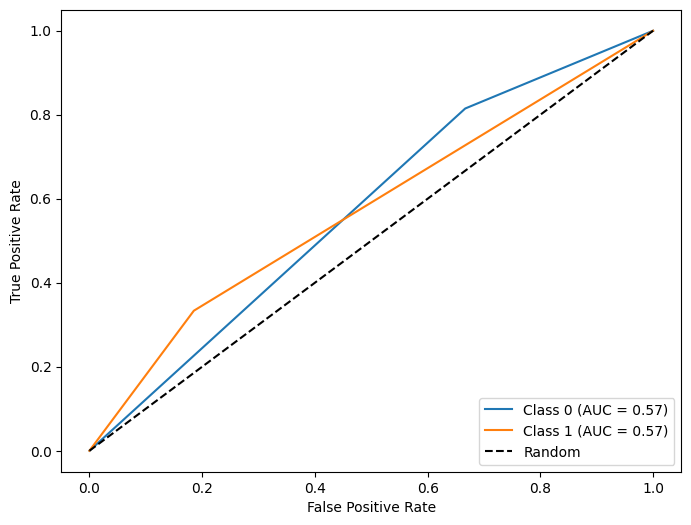

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

for i in range(2):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()